** 스마트워치 센서 데이터 기반 행동 분류 1일차 **
# ---------- 과제1 : 탐색적 데이터 분석 ----------

### [미션0] 미션 이해하기
   
   * 단말기 개발팀은 스마트워치의 센서에서 수집된 데이터를 분석하여 계단오르기 활동을 인지할 수 있는 AI 모델링을 요청 하였습니다.
   * 또 계단오르기를 분류 할 때 어떤 feature 들이 의미있는지 의미있는 feature들을 선정해 달라는 요청이 있었습니다.
   * 과제1 에서는 6가지의 행동패턴을 분류하는 AI 모델링을 수행하고 모델의 성능평가 지표를 출력해 주세요.
      * 6가지 행동 패턴: STANDING, SITTING, LAYING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
   

   

※ 과제완수 조건: 훈련 데이터와 센서 그룹 데이터를 읽어와 기초 데이터 분석을 수행하고 훈련 데이터로 모델링 하여 정확도 95% 이상을 달성해 보세요.

※  미션을 해결하면서 요구사항의 함수/변수명, 데이터 타입 잘 확인하고 코드를 작성하세요

---

### [미션1] 데이터 불러오기
* pandas, numpy, matplotlib, seaborn, os 등 데이터 분석에필요한 라이브러리와 모듈을 불러오세요.
* 라이브러리가 없을땐 !pip 명령어를 통해 필요한 라이브러리를 설치 하세요.
* 현위치 하위 'data' 폴더에서 'train_data.csv' 파일 읽어 오세요.

	- 실습순서: 라이브러리 불러오기 -> 현재 디렉토리 확인 -> -> 현재 디렉토리 폴더, 파일 확인 -> data 폴더 파일 확인 -> train_data.csv 불러오기 -> 'subject'열 제거

In [13]:
# 필요 라이브러리 설치
# !pip install pandas numpy
# !pip install matplotlib seaborn

In [14]:
# pandas, numpy, matplotlib.pyplot, seaborn, os 등 필요 라이브러리 호출
## 추가로 필요한 라이브러리는 설치/호출 하세요

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
# 현재 디렉토리 위치 확인
## 현재 디렉토리가 어디인지 확인 합니다.
## 아래의 결과는 강사의 현재 위치(에이블러 별 다를 수 있음)

os.getcwd()


'C:\\Users\\user\\KT수업자료\\미프 3차\\230920_미프3차_1일차_교육생용'

In [16]:
# 현재 디렉토리 폴더, 파일 확인
## 현재 디렉토리의 폴더와 파일을 출력하고, 하위 data 폴더의 유무를 확인하세요.


os.listdir('./')


['.ipynb_checkpoints',
 '4기 DX 미프3_지도학습_교안_1일차.pdf',
 'data',
 '미프3차_A레벨_과제1.ipynb',
 '미프3차_A레벨_과제2.ipynb',
 '미프3차_B레벨_과제1.ipynb',
 '미프3차_B레벨_과제2.ipynb']

In [17]:
# data 폴더 파일 확인
## 현재 디렉토리의 하위 폴더인 data 폴더의 파일을 확인 합니다.


os.listdir('./data')


['features 설명.xlsx', 'features.csv', 'train_data.csv']

In [18]:
# 데이터셋 파일 불러오기
## data 변수에 train_data.csv 파일을 불러와서 할당해 주세요.
## train_data.csv 파일은 현재위치의 하위 data 폴더안에 있습니다. 
## 변수에 할당이 잘 되었는지 확인해 주세요. 

data = pd.read_csv('data/train_data.csv')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,0.277194,-0.012389,-0.131974,-0.994046,-0.940578,-0.917337,-0.994261,-0.932830,-0.908088,-0.936219,...,-0.690363,-0.034888,-0.261437,-0.391477,-0.877612,-0.912365,0.114009,0.080146,21,SITTING
5877,0.191568,0.013328,-0.105174,-0.126969,-0.121729,-0.327480,-0.192523,-0.109923,-0.295286,0.078644,...,-0.879215,0.721718,0.623151,0.866858,-0.445660,-0.690278,0.303194,-0.044188,15,WALKING_UPSTAIRS
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,19,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,6,WALKING_UPSTAIRS


In [20]:
# 불필요한 열 제거
## 'subject'열 은 데이터를 수집한 사람을 구별하기 위한 데이터 입니다.
## 'subject'열을 data 데이터프레임 변수 에서 제거해 주세요.
## 'subject'열이 잘 제거 되었는지 확인해 주세요.

data = data.drop('subject', axis = 1)
data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING


### [미션2] 훈련 데이터셋(data) 기초정보 확인하기
* 데이터셋의 열과 행의 수, 데이터 형태, 기초통계량, Null 값 유무 등 데이터 기초정보를 확인하세요.
	



	- 실습순서: 데이터 행/열 개수 확인 -> 데이터 정보 확인 -> 수치형 데이터 기초통계 확인 -> 데이터 상위 5행 확인 -> 데이터 하위 3행 확인 -> 데이터 컬럼명 확인

In [22]:
# 데이터 프레임 모양 확인
## data 데이터프레임의 행,열 개수 확인해 주세요
data.shape


(5881, 562)

In [23]:
# 데이터 프레임의 상위 행 확인
## data 데이터프레임의 상위 5개 행을 확인해 주세요.
data.head(5)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [24]:
# 데이터 프레임의 하위 행 확인
## data 데이터 프레임의 하위 3개 행을 확인해 주세요.
data.tail(3)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
5878,0.267981,-0.018348,-0.107440,-0.991303,-0.989881,-0.990313,-0.992386,-0.988852,-0.991237,-0.936099,...,-0.597610,-0.886851,0.060173,0.228739,0.684400,-0.216665,0.620363,-0.437247,-0.571840,LAYING
5879,0.212787,-0.048130,-0.121001,-0.041373,0.052449,-0.585361,-0.100714,0.023353,-0.554707,0.219814,...,0.196921,-0.053556,0.260880,0.551742,-0.943773,-0.862899,-0.718009,0.292856,0.024920,WALKING_UPSTAIRS
5880,0.283815,-0.040658,-0.138018,-0.992662,-0.747190,-0.920248,-0.993410,-0.768055,-0.924587,-0.935871,...,-0.379740,-0.696584,0.107690,0.122242,-0.077226,-0.078091,-0.740244,0.008346,-0.146143,SITTING


In [26]:
# 데이터 프레임의 컬럼명 확인
# data 데이터 프레임의 모든 feature명(컬럼명)을 확인해 주세요.
data.columns


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [27]:
# 데이터 기초 정보 확인1
## data 데이터프레임의 기초 정보(컬럼명, 데이터 개수, 데이터 타입) 확인해 주세요.

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB


In [28]:
# 데이터 기초 정보 확인2
## data 데이터프레임의 컬럼명, 데이터 개수, 타입 정보를 보기 쉽게 출력해 주세요.
## .info 파라미터: verbose=True, null_counts=True

data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 562 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    tBodyAcc-mean()-X                     5881 non-null   float64
 1    tBodyAcc-mean()-Y                     5881 non-null   float64
 2    tBodyAcc-mean()-Z                     5881 non-null   float64
 3    tBodyAcc-std()-X                      5881 non-null   float64
 4    tBodyAcc-std()-Y                      5881 non-null   float64
 5    tBodyAcc-std()-Z                      5881 non-null   float64
 6    tBodyAcc-mad()-X                      5881 non-null   float64
 7    tBodyAcc-mad()-Y                      5881 non-null   float64
 8    tBodyAcc-mad()-Z                      5881 non-null   float64
 9    tBodyAcc-max()-X                      5881 non-null   float64
 10   tBodyAcc-max()-Y                      5881 non-null   float64
 11   tB

C:\Users\user\AppData\Local\Temp\ipykernel_11408\3094762651.py:5: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [29]:
# 데이터 프레임 기초통계 정보 확인
## data 데이터프레임의 수치형 데이터 기초통계 정보를 확인해 주세요.

data.describe()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


### [미션3] 데이터 프레임 Target 값 확인하기
* data 데이터셋의 target 컬럼인 data['Activity'] 열에 대해 단변량 분석을 수행합니다.
* 값(범주)의 종류, 값(범주)별 개수 및 비율을 검토하여 시각화 합니다.
 



	- 실습순서: target 데이터 고유값(범주) 확인 -> 고유값 별 개수 확인 -> 고유값(범주) 별 비율 확인 -> 고유값(범주) 개수 시각화(수직막대 그래프)

In [30]:
# target 데이터 고유값(범주) 확인
## data['Activity'] 컬럼의 고유한 값(범주)을 확인 합니다.

data['Activity'].values


array(['STANDING', 'LAYING', 'STANDING', ..., 'LAYING',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [31]:
# target 데이터 고유값 별 개수 확인
## .value_counts() 매서드를 사용하여 data['Activity'] 컬럼의 고유한 값(범주)을 종류별 카운트 하세요.

data['Activity'].value_counts()

LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: Activity, dtype: int64

In [34]:
# 고유값(범주) 별 비율 확인
## .value_counts(), .sum() 매서드를 사용하여 data['Activity'] 컬럼의 고유한 값(범주)의 종류별 비율을 확인 하세요. 
## [TIP] 고유값 비율 = 개별 범주의 수 / 전체 범주의 수 

data['Activity'].value_counts() / data['Activity'].value_counts().sum()

LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: Activity, dtype: float64

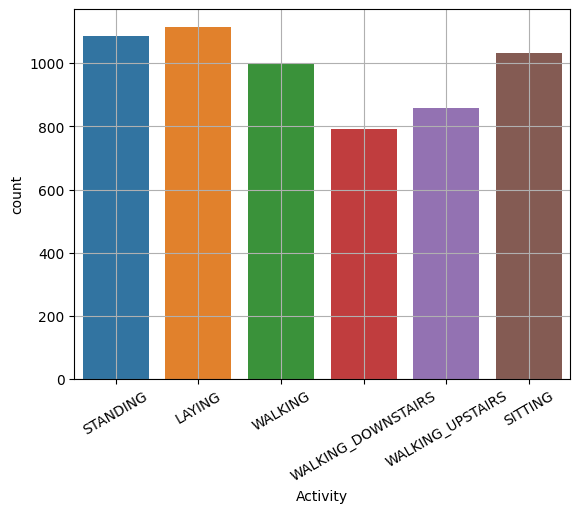

In [38]:
# 범주별 개수 시각화
## seaborn 라이브러리의 countplot 함수를 사용하여 data['Activity'] 열의 범주별 개수를 시각화 하세요.


sns.countplot(x = data['Activity'])
plt.xticks(rotation=30)
plt.grid()
plt.show()

### [미션4] 센서 그룹 데이터(features) 확인하기


* features.csv 파일은 train 데이터의 feature 들을 그룹으로 묶어 정리한 데이터 입니다.
* feature 들을 어떻게 그룹화 할 수 있는지 확인해 봅니다.
* data 폴더에서 feature.csv를 읽어와 각 센서그룹의 하위 계층의 수를 확인 하세요.

	- 실습순서:features.csv 불러오기-> 'sensor'열 고유값(범주) 별 비율 확인 -> 'feature_name'열 고유값(범주) 별 비율 확인 -> 'agg'열 고유값(범주) 별 비율 확인 -> 'axis'열 고유값(범주) 별 비율 확인

In [39]:
# features.csv 파일 불러오기
## 'data'폴더에서 features.csv 파일을 읽어와 features 변수에 할당 하세요.
## 변수에 할당이 잘 되었는지 확인해 주세요. 

features = pd.read_csv('data/features.csv')
features


,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y
...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)"
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)"
558,angle,X,gravityMean,"angle(X,gravityMean)"
559,angle,Y,gravityMean,"angle(Y,gravityMean)"


In [40]:
# features['sensor'] 데이터 고유값 별 개수 확인
## features 데이터프레임의 features['sensor'] 컬럼의 고유한 값 별 개수를 카운트 하세요
 
features['sensor'].value_counts()


fBodyGyro               79
fBodyAcc                79
fBodyAccJerk            79
tBodyAcc                40
tBodyAccJerk            40
tBodyGyro               40
tBodyGyroJerk           40
tGravityAcc             40
fBodyBodyGyroJerkMag    13
fBodyBodyGyroMag        13
fBodyBodyAccJerkMag     13
fBodyAccMag             13
tBodyGyroJerkMag        13
tBodyGyroMag            13
tBodyAccJerkMag         13
tGravityAccMag          13
tBodyAccMag             13
angle                    7
Name: sensor, dtype: int64

In [56]:
# features['feature_name']  데이터 고유값 별 개수 확인
## features 데이터프레임의 features['feature_name']  컬럼의 고유한 값 별 개수를 카운트 하세요.
 
features['feature_name'].value_counts()


fBodyGyro-bandsEnergy()-25,32    3
fBodyGyro-bandsEnergy()-49,56    3
fBodyGyro-bandsEnergy()-25,48    3
fBodyGyro-bandsEnergy()-1,24     3
fBodyGyro-bandsEnergy()-49,64    3
                                ..
tBodyGyroJerk-min()-X            1
tBodyGyroJerk-max()-Z            1
tBodyGyroJerk-max()-Y            1
tBodyGyroJerk-max()-X            1
angle(Z,gravityMean)             1
Name: feature_name, Length: 533, dtype: int64

In [57]:
# features['agg']  데이터 고유값 별 개수 확인
## features 데이터프레임의 features['agg'] 컬럼의 고유한 값 별 개수를 카운트 하세요.
 
features['agg'].value_counts()

bandsEnergy()        126
arCoeff()             60
mean()                33
mad()                 33
max()                 33
min()                 33
energy()              33
iqr()                 33
entropy()             33
std()                 33
sma()                 17
correlation()         15
meanFreq()            13
kurtosis()            13
skewness()            13
maxInds               13
arCoeff()3             5
arCoeff()4             5
arCoeff()2             5
arCoeff()1             5
tBodyAccMean           1
tBodyAccJerkMean       1
tBodyGyroMean          1
tBodyGyroJerkMean      1
X                      1
Y                      1
Z                      1
Name: agg, dtype: int64

In [58]:
# features['axis'] 데이터 고유값 별 개수 확인
## features 데이터프레임의 features['axis'] 컬럼의 고유한 값 별 개수를 카운트 하세요.

features['axis'].value_counts()

X              76
Y              76
Z              76
gravityMean     6
X,2             5
               ..
25,32.1         2
17,24.1         2
1,8.1           2
9,16.1          2
gravity         1
Name: axis, Length: 62, dtype: int64

### [미션5] 행동패턴 예측 AI 모델링 
* Random Forest 알고리즘을 사용하여 모델링을 실시 합니다.
* 학습 데이터 y(target) 는 data['Activity']를 사용하고, x 는 data['Activity']과 data['subject']를 제외한 나머지 561개의 data 컬럼을 사용합니다.
* 모델링이 완료되면 accuracy_score, confusion_matrix, classification_report 을 출력하세요.


	- 실습순서:AI 라이브러리 불러오기-> X, Y데이터 나누기 -> 학습 데이터 나누기 -> 모델 선언하기 -> 모델 학습 -> 모델 예측 -> 모델 성능 평가

In [59]:
# 필요 AI 알고리즘 라이브러리 설치
# !pip install scikit-learn


In [60]:
# RandomForestClassifier 알고리즘 불러오기
## AI 모델링을 위해 sklearn.ensemble 라이브러리의 RandomForestClassifier 알고리즘 호출 합니다.
## 데이터를 나누기 위해 sklearn.model_selection 모듈의 train_test_split 함수를 호출 합니다.
## 모델 성능평가 출력을 위해 sklearn.metrics 모듈의 모든 클래스 호출 합니다.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *



In [61]:
# 모델 학습을 위한 X, Y 데이터 나누기
## y 변수에 target으로 사용할 data['Activity']을 할당해 주세요.
## data 에서 data['Activity'] 열을 뺀 나머지 x 변수에 할당해 주세요.


y = data['Activity']
x = data.drop('Activity', axis=1)

x.head(2)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.032207,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.246705,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944


In [62]:
# 데이터 나누기
## 학습에 필요한 x 와 y 데이터를 학습 7 : 검증 3 비율로 나누어 주세요.
## 이때 random_state 는 2023 으로 설정해 주세요.
## 데이터를 할당받을 변수명: x_train, x_val, y_train, y_val

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 2023)

In [63]:
# 모델 선언하기
## rf_model 변수에 RandomForestClassifier 함수를 사용하여 모델을 호출 및 초기화 합니다.
## 이때 random_state 는 2023 으로 설정해 주세요.

rf_model = RandomForestClassifier(random_state=2023)




In [64]:
# 모델 학습하기
## 생성한 rf_model 모델 변수에 x_train, y_train 데이터를 대입하여 모델을 학습시킵니다.

rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=2023)

In [65]:
# 모델 예측하기
## 학습이 완료된 모델에 x_val 데이터를 대입하여 예측결과를 도출하고 rf_pred 변수에 할당 합니다.

rf_pred = rf_model.predict(x_val)

rf_pred

array(['WALKING', 'STANDING', 'LAYING', ..., 'WALKING', 'WALKING',
       'LAYING'], dtype=object)

In [66]:
# 모델 성능 평가
## 모델이 결과를 잘 예측하였는지 3가지 성능지표로 결과를 평가 합니다.
## 3가지 성능지표: accuracy_score, confusion_matrix, classification_report

print('accuracy_score: ',accuracy_score(y_val,rf_pred))

print('\n confusion_matrix: \n',confusion_matrix(y_val, rf_pred))

print('\n classification_report: \n',classification_report(y_val, rf_pred))

accuracy_score:  0.975070821529745

 confusion_matrix: 
 [[354   0   0   0   0   0]
 [  0 313  15   0   0   0]
 [  0  13 313   0   0   0]
 [  0   0   0 265   3   3]
 [  0   0   0   4 224   4]
 [  0   0   0   0   2 252]]

 classification_report: 
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       354
           SITTING       0.96      0.95      0.96       328
          STANDING       0.95      0.96      0.96       326
           WALKING       0.99      0.98      0.98       271
WALKING_DOWNSTAIRS       0.98      0.97      0.97       232
  WALKING_UPSTAIRS       0.97      0.99      0.98       254

          accuracy                           0.98      1765
         macro avg       0.98      0.97      0.98      1765
      weighted avg       0.98      0.98      0.98      1765



----------

# 수고하셨습니다.

----------